# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1
)


# Simulation setup

In [3]:
population_size = 1000
simulation_cycles = 180 # days

In [27]:
seed = 314

In [5]:
np.random.seed(seed)
scenario = {}

# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [34]:
sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
model = CovidModel(debug = True)
seed = 4353
np.random.seed(seed)
setup_city_layout(model, population_size)

self.current_state
SimulationState.COMMUTING_TO_MAIN_ACTIVITY
Home District:
HomogeneousBuilding0
[2, 1, 3, 2, 3, 2, 4, 4, 2, 3, 4, 1, 3, 1, 1, 3, 2, 3, 0, 0]
HomogeneousBuilding1
[3, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0]
HomogeneousBuilding2
[1, 3, 3, 2, 4, 3, 3, 3, 2, 5, 3, 2, 3, 3, 3, 1, 2, 2, 3, 2]
HomogeneousBuilding3
[3, 5, 5, 5, 5, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 1, 3, 1]
HomogeneousBuilding4
[1, 5, 3, 2, 5, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 4, 0, 0]
HomogeneousBuilding5
[2, 5, 5, 4, 4, 3, 4, 3, 2, 3, 4, 2, 3, 3, 3, 2, 4, 4, 0, 0]
HomogeneousBuilding6
[3, 3, 3, 2, 4, 5, 3, 3, 4, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1]
HomogeneousBuilding7
[5, 4, 4, 4, 2, 3, 5, 3, 3, 4, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding8
[3, 1, 5, 2, 5, 2, 5, 3, 5, 5, 2, 1, 2, 3, 3, 3, 1, 0, 0, 0]
HomogeneousBuilding9
[3, 5, 3, 5, 2, 3, 2, 3, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding10
[5, 5, 3, 2, 2, 5, 3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3]
HomogeneousBuilding1

HomogeneousBuilding1
[30, 30, 30, 30, 30, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding0-room0
['K12Student110', 'K12Student359', 'K12Student95', 'K12Student235', 'K12Student272', 'K12Student203', 'K12Student329', 'K12Student219', 'K12Student67', 'K12Student215', 'K12Student43', 'K12Student331', 'K12Student69', 'K12Student381', 'K12Student311', 'K12Student152', 'K12Student210', 'K12Student212', 'K12Student154', 'K12Student355', 'K12Student14', 'K12Student119', 'K12Student224', 'K12Student307', 'K12Student118', 'K12Student91', 'K12Student19', 'K12Student93', 'K12Student278', 'K12Student109']
HomogeneousBuilding0-room1
['K12Student520', 'K12Student360', 'K12Student330', 'K12Student204', 'K12Student153', 'K12Student442', 'K12Student490', 'K12Student415', 'K12Student403', 'K12Student461', 'K12Student448', 'K12Student451', 'K12Student310', 'K12Student504', 'K12Student488', 'K12Studen

HomogeneousBuilding11-room18
[]
HomogeneousBuilding11-room19
[]
HomogeneousBuilding12-room0
[]
HomogeneousBuilding12-room1
[]
HomogeneousBuilding12-room2
['Elder55']
HomogeneousBuilding12-room3
[]
HomogeneousBuilding12-room4
[]
HomogeneousBuilding12-room5
[]
HomogeneousBuilding12-room6
[]
HomogeneousBuilding12-room7
[]
HomogeneousBuilding12-room8
[]
HomogeneousBuilding12-room9
[]
HomogeneousBuilding12-room10
[]
HomogeneousBuilding12-room11
[]
HomogeneousBuilding12-room12
[]
HomogeneousBuilding12-room13
[]
HomogeneousBuilding12-room14
[]
HomogeneousBuilding12-room15
[]
HomogeneousBuilding12-room16
[]
HomogeneousBuilding12-room17
[]
HomogeneousBuilding12-room18
[]
HomogeneousBuilding12-room19
[]
HomogeneousBuilding13-room0
[]
HomogeneousBuilding13-room1
[]
HomogeneousBuilding13-room2
[]
HomogeneousBuilding13-room3
[]
HomogeneousBuilding13-room4
['Toddler458', 'Toddler459']
HomogeneousBuilding13-room5
[]
HomogeneousBuilding13-room6
[]
HomogeneousBuilding13-room7
[]
HomogeneousBuilding13-r

['Adult804', 'Adult803']
HomogeneousBuilding1-room13
['Adult821', 'Adult820']
HomogeneousBuilding1-room14
['Adult954', 'Adult955']
HomogeneousBuilding1-room15
['Adult961', 'K12Student963', 'Adult962']
HomogeneousBuilding1-room16
['Adult982', 'K12Student980', 'Adult981']
HomogeneousBuilding1-room17
[]
HomogeneousBuilding1-room18
[]
HomogeneousBuilding1-room19
[]
HomogeneousBuilding2-room0
['Adult13']
HomogeneousBuilding2-room1
['Elder57', 'Adult59', 'Adult58']
HomogeneousBuilding2-room2
['Adult63', 'Adult62', 'Adult64']
HomogeneousBuilding2-room3
['Elder158', 'Elder159']
HomogeneousBuilding2-room4
['Adult295', 'K12Student292', 'K12Student293', 'Adult294']
HomogeneousBuilding2-room5
['K12Student352', 'Adult350', 'Adult351']
HomogeneousBuilding2-room6
['Elder386', 'Adult385', 'Adult384']
HomogeneousBuilding2-room7
['Adult397', 'Adult396', 'Adult398']
HomogeneousBuilding2-room8
['K12Student461', 'Adult460']
HomogeneousBuilding2-room9
['Toddler473', 'Adult469', 'K12Student472', 'K12Student4

[]
HomogeneousBuilding1-room13
[]
HomogeneousBuilding1-room14
[]
HomogeneousBuilding1-room15
[]
HomogeneousBuilding1-room16
[]
HomogeneousBuilding1-room17
[]
HomogeneousBuilding1-room18
[]
HomogeneousBuilding1-room19
[]
HomogeneousBuilding1-room20
[]
HomogeneousBuilding1-room21
[]
HomogeneousBuilding1-room22
[]
HomogeneousBuilding1-room23
[]
HomogeneousBuilding1-room24
[]
HomogeneousBuilding1-room25
[]
HomogeneousBuilding1-room26
[]
HomogeneousBuilding1-room27
[]
HomogeneousBuilding1-room28
[]
HomogeneousBuilding1-room29
[]
HomogeneousBuilding1-room30
[]
HomogeneousBuilding1-room31
[]
HomogeneousBuilding1-room32
[]
HomogeneousBuilding1-room33
[]
HomogeneousBuilding1-room34
[]
HomogeneousBuilding1-room35
[]
HomogeneousBuilding1-room36
[]
HomogeneousBuilding1-room37
[]
HomogeneousBuilding1-room38
[]
HomogeneousBuilding1-room39
[]
HomogeneousBuilding1-room40
[]
HomogeneousBuilding1-room41
[]
HomogeneousBuilding1-room42
[]
HomogeneousBuilding1-room43
[]
HomogeneousBuilding1-room44
[]
Homog

['K12Student927', 'K12Student949', 'K12Student993', 'K12Student915', 'K12Student776', 'K12Student754']
HomogeneousBuilding0-room5
[]
HomogeneousBuilding0-room6
[]
HomogeneousBuilding0-room7
[]
HomogeneousBuilding0-room8
[]
HomogeneousBuilding0-room9
[]
HomogeneousBuilding0-room10
[]
HomogeneousBuilding0-room11
[]
HomogeneousBuilding0-room12
[]
HomogeneousBuilding0-room13
[]
HomogeneousBuilding0-room14
[]
HomogeneousBuilding0-room15
[]
HomogeneousBuilding0-room16
[]
HomogeneousBuilding0-room17
[]
HomogeneousBuilding0-room18
[]
HomogeneousBuilding0-room19
[]
HomogeneousBuilding0-room20
[]
HomogeneousBuilding0-room21
[]
HomogeneousBuilding0-room22
[]
HomogeneousBuilding0-room23
[]
HomogeneousBuilding0-room24
[]
HomogeneousBuilding0-room25
[]
HomogeneousBuilding0-room26
[]
HomogeneousBuilding0-room27
[]
HomogeneousBuilding0-room28
[]
HomogeneousBuilding0-room29
[]
HomogeneousBuilding0-room30
[]
HomogeneousBuilding0-room31
[]
HomogeneousBuilding0-room32
[]
HomogeneousBuilding0-room33
[]
Hom

[]
Restaurant14
[]
Restaurant15
[]
Restaurant16
[]
Restaurant17
[]
Restaurant18
[]
Restaurant19
[]
Restaurant20
[]
Restaurant21
[]
HomogeneousBuilding0-room0
[]
HomogeneousBuilding0-room1
[]
HomogeneousBuilding0-room2
[]
HomogeneousBuilding0-room3
[]
HomogeneousBuilding0-room4
[]
HomogeneousBuilding0-room5
[]
HomogeneousBuilding0-room6
[]
HomogeneousBuilding0-room7
[]
HomogeneousBuilding0-room8
[]
HomogeneousBuilding0-room9
[]
HomogeneousBuilding0-room10
[]
HomogeneousBuilding0-room11
[]
HomogeneousBuilding0-room12
[]
HomogeneousBuilding0-room13
[]
HomogeneousBuilding0-room14
[]
HomogeneousBuilding0-room15
[]
HomogeneousBuilding0-room16
[]
HomogeneousBuilding0-room17
[]
HomogeneousBuilding0-room18
[]
HomogeneousBuilding0-room19
[]
HomogeneousBuilding1-room0
[]
HomogeneousBuilding1-room1
[]
HomogeneousBuilding1-room2
[]
HomogeneousBuilding1-room3
[]
HomogeneousBuilding1-room4
[]
HomogeneousBuilding1-room5
[]
HomogeneousBuilding1-room6
[]
HomogeneousBuilding1-room7
[]
HomogeneousBuilding

['Adult328', 'Adult327', 'K12Student330', 'K12Student329', 'K12Student331']
HomogeneousBuilding15-room6
['Adult348', 'K12Student349']
HomogeneousBuilding15-room7
['Adult366', 'K12Student367']
HomogeneousBuilding15-room8
['Adult427', 'Adult426', 'K12Student428']
HomogeneousBuilding15-room9
['Adult429', 'Adult430', 'K12Student433', 'K12Student432', 'K12Student431']
HomogeneousBuilding15-room10
['Adult519', 'Adult518', 'K12Student520']
HomogeneousBuilding15-room11
['Adult630', 'Adult629']
HomogeneousBuilding15-room12
['Adult722', 'Adult721']
HomogeneousBuilding15-room13
['Adult746', 'Adult744', 'K12Student743', 'K12Student745']
HomogeneousBuilding15-room14
['Adult778', 'Adult777', 'K12Student776', 'K12Student775']
HomogeneousBuilding15-room15
['Adult784', 'Adult783', 'K12Student782']
HomogeneousBuilding15-room16
['Adult787', 'Adult786', 'K12Student785']
HomogeneousBuilding15-room17
['Adult842', 'Adult843', 'K12Student845', 'K12Student844']
HomogeneousBuilding15-room18
['Adult850', 'Adult8

self.current_state
SimulationState.COMMUTING_TO_MAIN_ACTIVITY
Home District:
HomogeneousBuilding0
[2, 1, 3, 2, 3, 2, 4, 4, 2, 3, 4, 1, 3, 1, 1, 3, 2, 3, 0, 0]
HomogeneousBuilding1
[3, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0]
HomogeneousBuilding2
[1, 3, 3, 2, 4, 3, 3, 3, 2, 5, 3, 2, 3, 3, 3, 1, 2, 2, 3, 2]
HomogeneousBuilding3
[3, 5, 5, 5, 5, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 1, 3, 1]
HomogeneousBuilding4
[1, 5, 3, 2, 5, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 4, 0, 0]
HomogeneousBuilding5
[2, 5, 5, 4, 4, 3, 4, 3, 2, 3, 4, 2, 3, 3, 3, 2, 4, 4, 0, 0]
HomogeneousBuilding6
[3, 3, 3, 2, 4, 5, 3, 3, 4, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1]
HomogeneousBuilding7
[5, 4, 4, 4, 2, 3, 5, 3, 3, 4, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding8
[3, 1, 5, 2, 5, 2, 5, 3, 5, 5, 2, 1, 2, 3, 3, 3, 1, 0, 0, 0]
HomogeneousBuilding9
[3, 5, 3, 5, 2, 3, 2, 3, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding10
[5, 5, 3, 2, 2, 5, 3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3]
HomogeneousBuilding1

[]
HomogeneousBuilding9-room0
['Adult42', 'Adult20', 'Adult75', 'Adult40', 'Adult3', 'Adult13', 'Adult73', 'Adult49', 'Adult58', 'Adult37']
HomogeneousBuilding9-room1
['Adult81', 'Adult132', 'Adult111', 'Adult182', 'Adult101', 'Adult187', 'Adult114', 'Adult88', 'Adult99', 'Adult64']
HomogeneousBuilding9-room2
['Adult513', 'Adult285', 'Adult373', 'Adult335', 'Adult519', 'Adult363', 'Adult294', 'Adult209', 'Adult231', 'Adult321']
HomogeneousBuilding9-room3
['Adult496', 'Adult444', 'Adult468', 'Adult467', 'Adult550', 'Adult512', 'Adult565', 'Adult528', 'Adult529', 'Adult417']
HomogeneousBuilding9-room4
['Adult612', 'Adult620', 'Adult623', 'Adult634', 'Adult672', 'Adult675', 'Adult610', 'Adult645', 'Adult682', 'Adult579']
HomogeneousBuilding9-room5
['Adult683', 'Adult759', 'Adult857', 'Adult738', 'Adult821', 'Adult722', 'Adult715', 'Adult841', 'Adult742', 'Adult727']
HomogeneousBuilding9-room6
['Adult917', 'Adult864', 'Adult946', 'Adult868', 'Adult919', 'Adult902', 'Adult922', 'Adult872', 

HomogeneousBuilding9-room12
[]
HomogeneousBuilding9-room13
[]
HomogeneousBuilding9-room14
[]
HomogeneousBuilding9-room15
[]
HomogeneousBuilding9-room16
[]
HomogeneousBuilding9-room17
[]
HomogeneousBuilding9-room18
[]
HomogeneousBuilding9-room19
[]
HomogeneousBuilding10-room0
[]
HomogeneousBuilding10-room1
[]
HomogeneousBuilding10-room2
[]
HomogeneousBuilding10-room3
['Elder163']
HomogeneousBuilding10-room4
['Elder165']
HomogeneousBuilding10-room5
[]
HomogeneousBuilding10-room6
[]
HomogeneousBuilding10-room7
[]
HomogeneousBuilding10-room8
[]
HomogeneousBuilding10-room9
['Toddler498']
HomogeneousBuilding10-room10
[]
HomogeneousBuilding10-room11
[]
HomogeneousBuilding10-room12
[]
HomogeneousBuilding10-room13
[]
HomogeneousBuilding10-room14
[]
HomogeneousBuilding10-room15
[]
HomogeneousBuilding10-room16
[]
HomogeneousBuilding10-room17
[]
HomogeneousBuilding10-room18
[]
HomogeneousBuilding10-room19
[]
HomogeneousBuilding11-room0
['Elder74']
HomogeneousBuilding11-room1
['Elder149']
Homogeneo

HomogeneousBuilding3-room7
['Adult354', 'Adult353', 'K12Student355']
HomogeneousBuilding3-room8
['K12Student412', 'Adult411']
HomogeneousBuilding3-room9
['Adult416', 'Adult418', 'Adult417']
HomogeneousBuilding3-room10
['K12Student425', 'Adult424']
HomogeneousBuilding3-room11
['Toddler563', 'Adult562', 'Adult561']
HomogeneousBuilding3-room12
['Adult579', 'Adult580', 'K12Student581']
HomogeneousBuilding3-room13
['Adult606', 'K12Student608', 'Adult607']
HomogeneousBuilding3-room14
['Adult631', 'Adult632']
HomogeneousBuilding3-room15
['K12Student643', 'Adult641', 'Adult642']
HomogeneousBuilding3-room16
['Adult701', 'Adult700']
HomogeneousBuilding3-room17
['Adult856']
HomogeneousBuilding3-room18
['Adult872', 'Adult873', 'K12Student874']
HomogeneousBuilding3-room19
['Adult888']
HomogeneousBuilding4-room0
['Adult12']
HomogeneousBuilding4-room1
['Toddler17', 'Toddler18', 'Adult16', 'K12Student14', 'Adult15']
HomogeneousBuilding4-room2
['Adult45', 'Adult44', 'K12Student43']
HomogeneousBuilding4

[]
HomogeneousBuilding1-room32
[]
HomogeneousBuilding1-room33
[]
HomogeneousBuilding1-room34
[]
HomogeneousBuilding1-room35
[]
HomogeneousBuilding1-room36
[]
HomogeneousBuilding1-room37
[]
HomogeneousBuilding1-room38
[]
HomogeneousBuilding1-room39
[]
HomogeneousBuilding1-room40
[]
HomogeneousBuilding1-room41
[]
HomogeneousBuilding1-room42
[]
HomogeneousBuilding1-room43
[]
HomogeneousBuilding1-room44
[]
HomogeneousBuilding1-room45
[]
HomogeneousBuilding1-room46
[]
HomogeneousBuilding1-room47
[]
HomogeneousBuilding1-room48
[]
HomogeneousBuilding1-room49
[]
self.current_state
SimulationState.COMMUTING_TO_MAIN_ACTIVITY
Home District:
HomogeneousBuilding0
[2, 1, 3, 2, 3, 2, 4, 4, 2, 3, 4, 1, 3, 1, 1, 3, 2, 3, 0, 0]
HomogeneousBuilding1
[3, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0]
HomogeneousBuilding2
[1, 3, 3, 2, 4, 3, 3, 3, 2, 5, 3, 2, 3, 3, 3, 1, 2, 2, 3, 2]
HomogeneousBuilding3
[3, 5, 5, 5, 5, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 1, 3, 1]
HomogeneousBuilding4
[1, 5, 3, 2, 

HomogeneousBuilding9-room6
['Adult902', 'Adult879', 'Adult917', 'Adult946', 'Adult905', 'Adult922', 'Adult868', 'Adult872', 'Adult919', 'Adult864']
HomogeneousBuilding9-room7
['Adult957']
HomogeneousBuilding9-room8
[]
HomogeneousBuilding9-room9
[]
HomogeneousBuilding9-room10
[]
HomogeneousBuilding9-room11
[]
HomogeneousBuilding9-room12
[]
HomogeneousBuilding9-room13
[]
HomogeneousBuilding9-room14
[]
HomogeneousBuilding9-room15
[]
HomogeneousBuilding9-room16
[]
HomogeneousBuilding9-room17
[]
HomogeneousBuilding9-room18
[]
HomogeneousBuilding9-room19
[]
School District:
HomogeneousBuilding0
[30, 30, 30, 30, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding1
[30, 30, 30, 30, 30, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding0-room0
['K12Student219', 'K12Student359', 'K12Studen

HomogeneousBuilding10-room17
[]
HomogeneousBuilding10-room18
[]
HomogeneousBuilding10-room19
[]
HomogeneousBuilding11-room0
['Elder74']
HomogeneousBuilding11-room1
['Elder149']
HomogeneousBuilding11-room2
[]
HomogeneousBuilding11-room3
[]
HomogeneousBuilding11-room4
[]
HomogeneousBuilding11-room5
['Toddler517']
HomogeneousBuilding11-room6
[]
HomogeneousBuilding11-room7
[]
HomogeneousBuilding11-room8
[]
HomogeneousBuilding11-room9
[]
HomogeneousBuilding11-room10
['Adult735']
HomogeneousBuilding11-room11
[]
HomogeneousBuilding11-room12
[]
HomogeneousBuilding11-room13
[]
HomogeneousBuilding11-room14
[]
HomogeneousBuilding11-room15
[]
HomogeneousBuilding11-room16
[]
HomogeneousBuilding11-room17
[]
HomogeneousBuilding11-room18
[]
HomogeneousBuilding11-room19
[]
HomogeneousBuilding12-room0
[]
HomogeneousBuilding12-room1
[]
HomogeneousBuilding12-room2
['Elder55']
HomogeneousBuilding12-room3
[]
HomogeneousBuilding12-room4
[]
HomogeneousBuilding12-room5
[]
HomogeneousBuilding12-room6
[]
Homogen

['K12Student933', 'Adult932', 'Adult931']
HomogeneousBuilding4-room15
['Adult935', 'Adult936', 'K12Student937']
HomogeneousBuilding4-room16
['K12Student949', 'Adult946', 'Adult947', 'K12Student948']
HomogeneousBuilding4-room17
['Adult988', 'Adult989', 'K12Student986', 'K12Student987']
HomogeneousBuilding4-room18
[]
HomogeneousBuilding4-room19
[]
HomogeneousBuilding5-room0
['Adult114', 'K12Student115']
HomogeneousBuilding5-room1
['Adult166', 'K12Student170', 'K12Student168', 'Adult167', 'K12Student169']
HomogeneousBuilding5-room2
['K12Student200', 'K12Student198', 'K12Student199', 'Adult196', 'Adult197']
HomogeneousBuilding5-room3
['Toddler227', 'Adult226', 'K12Student224', 'Adult225']
HomogeneousBuilding5-room4
['Toddler290', 'Toddler291', 'Adult288', 'Adult289']
HomogeneousBuilding5-room5
['Elder343', 'Adult344', 'Adult345']
HomogeneousBuilding5-room6
['Toddler377', 'Adult376', 'K12Student375', 'Adult374']
HomogeneousBuilding5-room7
['Adult414', 'K12Student415', 'Adult413']
Homogeneou

self.current_state
SimulationState.COMMUTING_TO_MAIN_ACTIVITY
Home District:
HomogeneousBuilding0
[2, 1, 3, 2, 3, 2, 4, 4, 2, 3, 4, 1, 3, 1, 1, 3, 2, 3, 0, 0]
HomogeneousBuilding1
[3, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0]
HomogeneousBuilding2
[1, 3, 3, 2, 4, 3, 3, 3, 2, 5, 3, 2, 3, 3, 3, 1, 2, 2, 3, 2]
HomogeneousBuilding3
[3, 5, 5, 5, 5, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 1, 3, 1]
HomogeneousBuilding4
[1, 5, 3, 2, 5, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 4, 0, 0]
HomogeneousBuilding5
[2, 5, 5, 4, 4, 3, 4, 3, 2, 3, 4, 2, 3, 3, 3, 2, 4, 4, 0, 0]
HomogeneousBuilding6
[3, 3, 3, 2, 4, 5, 3, 3, 4, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1]
HomogeneousBuilding7
[5, 4, 4, 4, 2, 3, 5, 3, 3, 4, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding8
[3, 1, 5, 2, 5, 2, 5, 3, 5, 5, 2, 1, 2, 3, 3, 3, 1, 0, 0, 0]
HomogeneousBuilding9
[3, 5, 3, 5, 2, 3, 2, 3, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding10
[5, 5, 3, 2, 2, 5, 3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3]
HomogeneousBuilding1

[]
HomogeneousBuilding9-room13
[]
HomogeneousBuilding9-room14
[]
HomogeneousBuilding9-room15
[]
HomogeneousBuilding9-room16
[]
HomogeneousBuilding9-room17
[]
HomogeneousBuilding9-room18
[]
HomogeneousBuilding9-room19
[]
School District:
HomogeneousBuilding0
[30, 30, 30, 30, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding1
[30, 30, 30, 30, 30, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding0-room0
['K12Student43', 'K12Student91', 'K12Student355', 'K12Student224', 'K12Student93', 'K12Student329', 'K12Student272', 'K12Student331', 'K12Student118', 'K12Student235', 'K12Student212', 'K12Student307', 'K12Student110', 'K12Student19', 'K12Student359', 'K12Student69', 'K12Student14', 'K12Student152', 'K12Student381', 'K12Student154', 'K12Student109', 'K12Student278', 'K12Student119

HomogeneousBuilding12-room7
[]
HomogeneousBuilding12-room8
[]
HomogeneousBuilding12-room9
[]
HomogeneousBuilding12-room10
[]
HomogeneousBuilding12-room11
[]
HomogeneousBuilding12-room12
[]
HomogeneousBuilding12-room13
[]
HomogeneousBuilding12-room14
[]
HomogeneousBuilding12-room15
[]
HomogeneousBuilding12-room16
[]
HomogeneousBuilding12-room17
[]
HomogeneousBuilding12-room18
[]
HomogeneousBuilding12-room19
[]
HomogeneousBuilding13-room0
[]
HomogeneousBuilding13-room1
[]
HomogeneousBuilding13-room2
['Adult216']
HomogeneousBuilding13-room3
[]
HomogeneousBuilding13-room4
['Toddler458', 'Toddler459']
HomogeneousBuilding13-room5
[]
HomogeneousBuilding13-room6
[]
HomogeneousBuilding13-room7
[]
HomogeneousBuilding13-room8
[]
HomogeneousBuilding13-room9
[]
HomogeneousBuilding13-room10
[]
HomogeneousBuilding13-room11
[]
HomogeneousBuilding13-room12
[]
HomogeneousBuilding13-room13
[]
HomogeneousBuilding13-room14
[]
HomogeneousBuilding13-room15
[]
HomogeneousBuilding13-room16
[]
HomogeneousBuildi

HomogeneousBuilding4-room7
['Adult419', 'K12Student421', 'Adult420']
HomogeneousBuilding4-room8
['Adult468', 'Adult466', 'Adult467']
HomogeneousBuilding4-room9
['Toddler556', 'Adult553', 'K12Student555', 'Adult554']
HomogeneousBuilding4-room10
['Adult668', 'Adult667', 'K12Student669']
HomogeneousBuilding4-room11
['K12Student725', 'Adult726', 'Adult727']
HomogeneousBuilding4-room12
['Adult774', 'K12Student772', 'Adult773']
HomogeneousBuilding4-room13
['Adult847', 'Adult846']
HomogeneousBuilding4-room14
['Adult932', 'K12Student933', 'Adult931']
HomogeneousBuilding4-room15
['Adult936', 'Adult935', 'K12Student937']
HomogeneousBuilding4-room16
['K12Student949', 'K12Student948', 'Adult947', 'Adult946']
HomogeneousBuilding4-room17
['Adult988', 'K12Student987', 'Adult989', 'K12Student986']
HomogeneousBuilding4-room18
[]
HomogeneousBuilding4-room19
[]
HomogeneousBuilding5-room0
['K12Student115', 'Adult114']
HomogeneousBuilding5-room1
['K12Student170', 'Adult166', 'K12Student168', 'K12Student169

self.current_state
SimulationState.COMMUTING_TO_MAIN_ACTIVITY
Home District:
HomogeneousBuilding0
[2, 1, 3, 2, 3, 2, 4, 4, 2, 3, 4, 1, 3, 1, 1, 3, 2, 3, 0, 0]
HomogeneousBuilding1
[3, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0]
HomogeneousBuilding2
[1, 3, 3, 2, 4, 3, 3, 3, 2, 5, 3, 2, 3, 3, 3, 1, 2, 2, 3, 2]
HomogeneousBuilding3
[3, 5, 5, 5, 5, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 1, 3, 1]
HomogeneousBuilding4
[1, 5, 3, 2, 5, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 4, 0, 0]
HomogeneousBuilding5
[2, 5, 5, 4, 4, 3, 4, 3, 2, 3, 4, 2, 3, 3, 3, 2, 4, 4, 0, 0]
HomogeneousBuilding6
[3, 3, 3, 2, 4, 5, 3, 3, 4, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1]
HomogeneousBuilding7
[5, 4, 4, 4, 2, 3, 5, 3, 3, 4, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding8
[3, 1, 5, 2, 5, 2, 5, 3, 5, 5, 2, 1, 2, 3, 3, 3, 1, 0, 0, 0]
HomogeneousBuilding9
[3, 5, 3, 5, 2, 3, 2, 3, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding10
[5, 5, 3, 2, 2, 5, 3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3]
HomogeneousBuilding1

['Adult682', 'Adult634', 'Adult579', 'Adult610', 'Adult675', 'Adult645', 'Adult620', 'Adult672', 'Adult623']
HomogeneousBuilding9-room5
['Adult857', 'Adult742', 'Adult715', 'Adult722', 'Adult821', 'Adult738', 'Adult759', 'Adult841', 'Adult683']
HomogeneousBuilding9-room6
['Adult946', 'Adult879', 'Adult868', 'Adult922', 'Adult864', 'Adult905', 'Adult872', 'Adult902', 'Adult919']
HomogeneousBuilding9-room7
[]
HomogeneousBuilding9-room8
[]
HomogeneousBuilding9-room9
[]
HomogeneousBuilding9-room10
[]
HomogeneousBuilding9-room11
[]
HomogeneousBuilding9-room12
[]
HomogeneousBuilding9-room13
[]
HomogeneousBuilding9-room14
[]
HomogeneousBuilding9-room15
[]
HomogeneousBuilding9-room16
[]
HomogeneousBuilding9-room17
[]
HomogeneousBuilding9-room18
[]
HomogeneousBuilding9-room19
[]
School District:
HomogeneousBuilding0
[30, 30, 30, 30, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding1
[30, 

[]
HomogeneousBuilding12-room5
['Adult131']
HomogeneousBuilding12-room6
[]
HomogeneousBuilding12-room7
[]
HomogeneousBuilding12-room8
[]
HomogeneousBuilding12-room9
[]
HomogeneousBuilding12-room10
[]
HomogeneousBuilding12-room11
[]
HomogeneousBuilding12-room12
[]
HomogeneousBuilding12-room13
[]
HomogeneousBuilding12-room14
[]
HomogeneousBuilding12-room15
[]
HomogeneousBuilding12-room16
[]
HomogeneousBuilding12-room17
[]
HomogeneousBuilding12-room18
[]
HomogeneousBuilding12-room19
[]
HomogeneousBuilding13-room0
[]
HomogeneousBuilding13-room1
[]
HomogeneousBuilding13-room2
['Adult216']
HomogeneousBuilding13-room3
[]
HomogeneousBuilding13-room4
['Toddler458', 'Toddler459']
HomogeneousBuilding13-room5
[]
HomogeneousBuilding13-room6
[]
HomogeneousBuilding13-room7
[]
HomogeneousBuilding13-room8
[]
HomogeneousBuilding13-room9
[]
HomogeneousBuilding13-room10
[]
HomogeneousBuilding13-room11
[]
HomogeneousBuilding13-room12
[]
HomogeneousBuilding13-room13
[]
HomogeneousBuilding13-room14
[]
Homoge

['Adult230', 'Adult229', 'Adult231']
HomogeneousBuilding4-room6
['K12Student323', 'Adult325', 'K12Student326', 'Adult324']
HomogeneousBuilding4-room7
['Adult419', 'Adult420', 'K12Student421']
HomogeneousBuilding4-room8
['Adult467', 'Adult468', 'Adult466']
HomogeneousBuilding4-room9
['Toddler556', 'Adult553', 'K12Student555', 'Adult554']
HomogeneousBuilding4-room10
['Adult667', 'Adult668', 'K12Student669']
HomogeneousBuilding4-room11
['Adult727', 'K12Student725', 'Adult726']
HomogeneousBuilding4-room12
['Adult774', 'Adult773', 'K12Student772']
HomogeneousBuilding4-room13
['Adult846', 'Adult847']
HomogeneousBuilding4-room14
['Adult931', 'Adult932', 'K12Student933']
HomogeneousBuilding4-room15
['Adult935', 'Adult936', 'K12Student937']
HomogeneousBuilding4-room16
['K12Student949', 'K12Student948', 'Adult947', 'Adult946']
HomogeneousBuilding4-room17
['Adult988', 'Adult989', 'K12Student987', 'K12Student986']
HomogeneousBuilding4-room18
[]
HomogeneousBuilding4-room19
[]
HomogeneousBuilding5-r

self.current_state
SimulationState.COMMUTING_TO_MAIN_ACTIVITY
Home District:
HomogeneousBuilding0
[2, 1, 3, 2, 3, 2, 4, 4, 2, 3, 4, 1, 3, 1, 1, 3, 2, 3, 0, 0]
HomogeneousBuilding1
[3, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0]
HomogeneousBuilding2
[1, 3, 3, 2, 4, 3, 3, 3, 2, 5, 3, 2, 3, 3, 3, 1, 2, 2, 3, 2]
HomogeneousBuilding3
[3, 5, 5, 5, 5, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 1, 3, 1]
HomogeneousBuilding4
[1, 5, 3, 2, 5, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 4, 0, 0]
HomogeneousBuilding5
[2, 5, 5, 4, 4, 3, 4, 3, 2, 3, 4, 2, 3, 3, 3, 2, 4, 4, 0, 0]
HomogeneousBuilding6
[3, 3, 3, 2, 4, 5, 3, 3, 4, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1]
HomogeneousBuilding7
[5, 4, 4, 4, 2, 3, 5, 3, 3, 4, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding8
[3, 1, 5, 2, 5, 2, 5, 3, 5, 5, 2, 1, 2, 3, 3, 3, 1, 0, 0, 0]
HomogeneousBuilding9
[3, 5, 3, 5, 2, 3, 2, 3, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
HomogeneousBuilding10
[5, 5, 3, 2, 2, 5, 3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3]
HomogeneousBuilding1

HomogeneousBuilding8-room17
[]
HomogeneousBuilding8-room18
[]
HomogeneousBuilding8-room19
[]
HomogeneousBuilding9-room0
['Adult13', 'Adult58', 'Adult75', 'Adult3', 'Adult37', 'Adult73', 'Adult42', 'Adult49']
HomogeneousBuilding9-room1
['Adult187', 'Adult88', 'Adult81', 'Adult132', 'Adult101', 'Adult111', 'Adult64', 'Adult182', 'Adult114', 'Adult99']
HomogeneousBuilding9-room2
['Adult231', 'Adult209', 'Adult373', 'Adult321', 'Adult363', 'Adult513', 'Adult285', 'Adult335']
HomogeneousBuilding9-room3
['Adult512', 'Adult467', 'Adult496', 'Adult528', 'Adult468', 'Adult417', 'Adult550', 'Adult444', 'Adult565', 'Adult529']
HomogeneousBuilding9-room4
['Adult623', 'Adult579', 'Adult675', 'Adult682', 'Adult645', 'Adult634', 'Adult620', 'Adult672', 'Adult610']
HomogeneousBuilding9-room5
['Adult759', 'Adult722', 'Adult821', 'Adult715', 'Adult683', 'Adult841', 'Adult857', 'Adult742', 'Adult738']
HomogeneousBuilding9-room6
['Adult946', 'Adult868', 'Adult902', 'Adult864', 'Adult922', 'Adult872', 'Adu

HomogeneousBuilding9-room15
[]
HomogeneousBuilding9-room16
[]
HomogeneousBuilding9-room17
[]
HomogeneousBuilding9-room18
[]
HomogeneousBuilding9-room19
[]
HomogeneousBuilding10-room0
[]
HomogeneousBuilding10-room1
[]
HomogeneousBuilding10-room2
[]
HomogeneousBuilding10-room3
['Elder163', 'Adult162']
HomogeneousBuilding10-room4
['Elder165']
HomogeneousBuilding10-room5
[]
HomogeneousBuilding10-room6
[]
HomogeneousBuilding10-room7
[]
HomogeneousBuilding10-room8
[]
HomogeneousBuilding10-room9
['Toddler498']
HomogeneousBuilding10-room10
[]
HomogeneousBuilding10-room11
[]
HomogeneousBuilding10-room12
[]
HomogeneousBuilding10-room13
[]
HomogeneousBuilding10-room14
[]
HomogeneousBuilding10-room15
['Adult836']
HomogeneousBuilding10-room16
[]
HomogeneousBuilding10-room17
[]
HomogeneousBuilding10-room18
[]
HomogeneousBuilding10-room19
[]
HomogeneousBuilding11-room0
['Elder74']
HomogeneousBuilding11-room1
['Elder149']
HomogeneousBuilding11-room2
[]
HomogeneousBuilding11-room3
[]
HomogeneousBuildin

['Adult804', 'Adult803']
HomogeneousBuilding1-room13
['Adult820', 'Adult821']
HomogeneousBuilding1-room14
['Adult955', 'Adult954']
HomogeneousBuilding1-room15
['K12Student963', 'Adult961', 'Adult962']
HomogeneousBuilding1-room16
['Adult981', 'K12Student980', 'Adult982']
HomogeneousBuilding1-room17
[]
HomogeneousBuilding1-room18
[]
HomogeneousBuilding1-room19
[]
HomogeneousBuilding2-room0
['Adult13']
HomogeneousBuilding2-room1
['Elder57', 'Adult59', 'Adult58']
HomogeneousBuilding2-room2
['Adult62', 'Adult63', 'Adult64']
HomogeneousBuilding2-room3
['Elder158', 'Elder159']
HomogeneousBuilding2-room4
['Adult294', 'Adult295', 'K12Student293', 'K12Student292']
HomogeneousBuilding2-room5
['Adult351', 'K12Student352', 'Adult350']
HomogeneousBuilding2-room6
['Elder386', 'Adult385', 'Adult384']
HomogeneousBuilding2-room7
['Adult396', 'Adult398', 'Adult397']
HomogeneousBuilding2-room8
['K12Student461', 'Adult460']
HomogeneousBuilding2-room9
['Toddler473', 'K12Student472', 'Adult469', 'K12Student4

HomogeneousBuilding1-room4
[]
HomogeneousBuilding1-room5
[]
HomogeneousBuilding1-room6
[]
HomogeneousBuilding1-room7
[]
HomogeneousBuilding1-room8
[]
HomogeneousBuilding1-room9
[]
HomogeneousBuilding1-room10
[]
HomogeneousBuilding1-room11
[]
HomogeneousBuilding1-room12
[]
HomogeneousBuilding1-room13
[]
HomogeneousBuilding1-room14
[]
HomogeneousBuilding1-room15
[]
HomogeneousBuilding1-room16
[]
HomogeneousBuilding1-room17
[]
HomogeneousBuilding1-room18
[]
HomogeneousBuilding1-room19
[]
HomogeneousBuilding1-room20
[]
HomogeneousBuilding1-room21
[]
HomogeneousBuilding1-room22
[]
HomogeneousBuilding1-room23
[]
HomogeneousBuilding1-room24
[]
HomogeneousBuilding1-room25
[]
HomogeneousBuilding1-room26
[]
HomogeneousBuilding1-room27
[]
HomogeneousBuilding1-room28
[]
HomogeneousBuilding1-room29
[]
HomogeneousBuilding1-room30
[]
HomogeneousBuilding1-room31
[]
HomogeneousBuilding1-room32
[]
HomogeneousBuilding1-room33
[]
HomogeneousBuilding1-room34
[]
HomogeneousBuilding1-room35
[]
HomogeneousBui

HomogeneousBuilding8-room13
[]
HomogeneousBuilding8-room14
[]
HomogeneousBuilding8-room15
[]
HomogeneousBuilding8-room16
[]
HomogeneousBuilding8-room17
[]
HomogeneousBuilding8-room18
[]
HomogeneousBuilding8-room19
[]
HomogeneousBuilding9-room0
['Adult3', 'Adult42', 'Adult13', 'Adult49', 'Adult58', 'Adult37', 'Adult73', 'Adult75']
HomogeneousBuilding9-room1
['Adult101', 'Adult114', 'Adult64', 'Adult99', 'Adult111', 'Adult81', 'Adult187', 'Adult182', 'Adult132']
HomogeneousBuilding9-room2
['Adult321', 'Adult209', 'Adult231', 'Adult285', 'Adult335', 'Adult363', 'Adult513', 'Adult373']
HomogeneousBuilding9-room3
['Adult529', 'Adult550', 'Adult417', 'Adult468', 'Adult444', 'Adult496', 'Adult528', 'Adult512', 'Adult467', 'Adult565']
HomogeneousBuilding9-room4
['Adult579', 'Adult645', 'Adult675', 'Adult682', 'Adult634', 'Adult620', 'Adult610', 'Adult623', 'Adult672']
HomogeneousBuilding9-room5
['Adult738', 'Adult821', 'Adult759', 'Adult683', 'Adult841', 'Adult742', 'Adult857']
HomogeneousBuil

HomogeneousBuilding8-room6
['Toddler482']
HomogeneousBuilding8-room7
[]
HomogeneousBuilding8-room8
[]
HomogeneousBuilding8-room9
[]
HomogeneousBuilding8-room10
[]
HomogeneousBuilding8-room11
[]
HomogeneousBuilding8-room12
[]
HomogeneousBuilding8-room13
[]
HomogeneousBuilding8-room14
[]
HomogeneousBuilding8-room15
['Adult941']
HomogeneousBuilding8-room16
[]
HomogeneousBuilding8-room17
[]
HomogeneousBuilding8-room18
[]
HomogeneousBuilding8-room19
[]
HomogeneousBuilding9-room0
['Elder87', 'Adult88']
HomogeneousBuilding9-room1
[]
HomogeneousBuilding9-room2
[]
HomogeneousBuilding9-room3
[]
HomogeneousBuilding9-room4
[]
HomogeneousBuilding9-room5
[]
HomogeneousBuilding9-room6
[]
HomogeneousBuilding9-room7
[]
HomogeneousBuilding9-room8
[]
HomogeneousBuilding9-room9
[]
HomogeneousBuilding9-room10
[]
HomogeneousBuilding9-room11
[]
HomogeneousBuilding9-room12
[]
HomogeneousBuilding9-room13
[]
HomogeneousBuilding9-room14
[]
HomogeneousBuilding9-room15
[]
HomogeneousBuilding9-room16
[]
Homogeneous

HomogeneousBuilding0-room4
['K12Student648', 'Adult647', 'Adult646']
HomogeneousBuilding0-room5
['Adult649', 'Adult650']
HomogeneousBuilding0-room6
['Adult656', 'K12Student657', 'Adult655', 'K12Student658']
HomogeneousBuilding0-room7
['K12Student663', 'K12Student664', 'Adult661', 'Adult662']
HomogeneousBuilding0-room8
['Adult671', 'Adult670']
HomogeneousBuilding0-room9
['K12Student765', 'Adult767', 'Adult766']
HomogeneousBuilding0-room10
['Adult770', 'Adult771', 'K12Student768', 'K12Student769']
HomogeneousBuilding0-room11
['Adult796']
HomogeneousBuilding0-room12
['Adult802', 'K12Student800', 'Adult801']
HomogeneousBuilding0-room13
['Adult919']
HomogeneousBuilding0-room14
['Adult950']
HomogeneousBuilding0-room15
['Adult957', 'Adult956', 'K12Student958']
HomogeneousBuilding0-room16
['Adult969', 'Adult970']
HomogeneousBuilding0-room17
['Adult979', 'K12Student977', 'Adult978']
HomogeneousBuilding0-room18
[]
HomogeneousBuilding0-room19
[]
HomogeneousBuilding1-room0
['Adult232', 'K12Student

[]
HomogeneousBuilding0-room21
[]
HomogeneousBuilding0-room22
[]
HomogeneousBuilding0-room23
[]
HomogeneousBuilding0-room24
[]
HomogeneousBuilding0-room25
[]
HomogeneousBuilding0-room26
[]
HomogeneousBuilding0-room27
[]
HomogeneousBuilding0-room28
[]
HomogeneousBuilding0-room29
[]
HomogeneousBuilding0-room30
[]
HomogeneousBuilding0-room31
[]
HomogeneousBuilding0-room32
[]
HomogeneousBuilding0-room33
[]
HomogeneousBuilding0-room34
[]
HomogeneousBuilding0-room35
[]
HomogeneousBuilding0-room36
[]
HomogeneousBuilding0-room37
[]
HomogeneousBuilding0-room38
[]
HomogeneousBuilding0-room39
[]
HomogeneousBuilding0-room40
[]
HomogeneousBuilding0-room41
[]
HomogeneousBuilding0-room42
[]
HomogeneousBuilding0-room43
[]
HomogeneousBuilding0-room44
[]
HomogeneousBuilding0-room45
[]
HomogeneousBuilding0-room46
[]
HomogeneousBuilding0-room47
[]
HomogeneousBuilding0-room48
[]
HomogeneousBuilding0-room49
[]
HomogeneousBuilding1-room0
[]
HomogeneousBuilding1-room1
[]
HomogeneousBuilding1-room2
[]
Homogene

[]
HomogeneousBuilding0-room11
[]
HomogeneousBuilding0-room12
[]
HomogeneousBuilding0-room13
[]
HomogeneousBuilding0-room14
[]
HomogeneousBuilding0-room15
[]
HomogeneousBuilding0-room16
[]
HomogeneousBuilding0-room17
[]
HomogeneousBuilding0-room18
[]
HomogeneousBuilding0-room19
[]
HomogeneousBuilding0-room20
[]
HomogeneousBuilding0-room21
[]
HomogeneousBuilding0-room22
[]
HomogeneousBuilding0-room23
[]
HomogeneousBuilding0-room24
[]
HomogeneousBuilding0-room25
[]
HomogeneousBuilding0-room26
[]
HomogeneousBuilding0-room27
[]
HomogeneousBuilding0-room28
[]
HomogeneousBuilding0-room29
[]
HomogeneousBuilding0-room30
[]
HomogeneousBuilding0-room31
[]
HomogeneousBuilding0-room32
[]
HomogeneousBuilding0-room33
[]
HomogeneousBuilding0-room34
[]
HomogeneousBuilding0-room35
[]
HomogeneousBuilding0-room36
[]
HomogeneousBuilding0-room37
[]
HomogeneousBuilding0-room38
[]
HomogeneousBuilding0-room39
[]
HomogeneousBuilding0-room40
[]
HomogeneousBuilding0-room41
[]
HomogeneousBuilding0-room42
[]
Homog

Restaurant10
[]
Restaurant11
[]
Restaurant12
[]
Restaurant13
[]
Restaurant14
[]
Restaurant15
[]
Restaurant16
[]
Restaurant17
[]
Restaurant18
[]
Restaurant19
[]
Restaurant20
[]
Restaurant21
[]
HomogeneousBuilding0-room0
[]
HomogeneousBuilding0-room1
[]
HomogeneousBuilding0-room2
[]
HomogeneousBuilding0-room3
[]
HomogeneousBuilding0-room4
[]
HomogeneousBuilding0-room5
[]
HomogeneousBuilding0-room6
[]
HomogeneousBuilding0-room7
[]
HomogeneousBuilding0-room8
[]
HomogeneousBuilding0-room9
[]
HomogeneousBuilding0-room10
[]
HomogeneousBuilding0-room11
[]
HomogeneousBuilding0-room12
[]
HomogeneousBuilding0-room13
[]
HomogeneousBuilding0-room14
[]
HomogeneousBuilding0-room15
[]
HomogeneousBuilding0-room16
[]
HomogeneousBuilding0-room17
[]
HomogeneousBuilding0-room18
[]
HomogeneousBuilding0-room19
[]
HomogeneousBuilding1-room0
[]
HomogeneousBuilding1-room1
[]
HomogeneousBuilding1-room2
[]
HomogeneousBuilding1-room3
[]
HomogeneousBuilding1-room4
[]
HomogeneousBuilding1-room5
[]
HomogeneousBuildin

HomogeneousBuilding14-room4
['Adult237']
HomogeneousBuilding14-room5
['Adult256', 'Adult257', 'K12Student255', 'K12Student254']
HomogeneousBuilding14-room6
['Elder338', 'Adult337']
HomogeneousBuilding14-room7
['Adult495', 'Adult494', 'Adult496']
HomogeneousBuilding14-room8
['Adult501', 'Adult500', 'Adult499']
HomogeneousBuilding14-room9
['Adult550', 'Adult551', 'K12Student552']
HomogeneousBuilding14-room10
['Adult578', 'Adult577']
HomogeneousBuilding14-room11
['Adult627', 'Adult628']
HomogeneousBuilding14-room12
['Adult645', 'Adult644']
HomogeneousBuilding14-room13
['Adult679', 'Adult680', 'K12Student681']
HomogeneousBuilding14-room14
['Adult813', 'Adult812']
HomogeneousBuilding14-room15
['Adult815', 'Adult814', 'K12Student816']
HomogeneousBuilding14-room16
['Adult878', 'Adult879']
HomogeneousBuilding14-room17
['Adult883', 'Adult882', 'K12Student884']
HomogeneousBuilding14-room18
['Adult917', 'Adult916', 'K12Student918']
HomogeneousBuilding14-room19
['Adult976', 'Adult975', 'K12Student

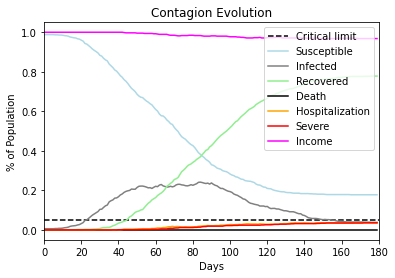

In [35]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

In [8]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[247, 774, 1840]
run with seed 247:
run with seed 774:
run with seed 1840:
using average of time series:
stats on susceptible:
data: [0.2835722222222222, 0.9701944444444442, 0.2588333333333333]
min:
0.2588333333333333
max:
0.9701944444444442
std:
0.3296625748101422
mean:
0.5041999999999999
median:
0.2835722222222222
95% confidence interval for the mean:
(-0.49877693021432956,1.5071769302143294)
using average of time series:
stats on infected:
data: [0.15236666666666668, 0.0033277777777777776, 0.15555555555555553]
min:
0.0033277777777777776
max:
0.15555555555555553
std:
0.07102116722087604
mean:
0.10375000000000001
median:
0.15236666666666668
95% confidence interval for the mean:
(-0.11232727938318984,0.3198272793831899)
using average of time series:
stats on recovered:
data: [0.5509777777777779, 0.014477777777777777, 0.5722944444444445]
min:
0.014477777777777777
max:
0.5722944444444445
std:
0.2580796784562837
mean:
0.3792500000000001
med

(<function dict.items>, <function dict.items>)

## Scenario 2

Complete lockdown

In [28]:
sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)

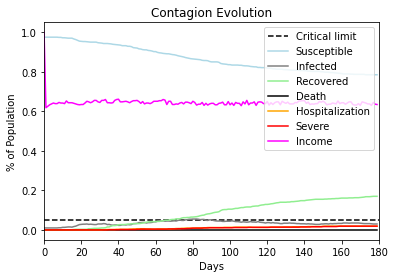

In [29]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [11]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[2740, 2145, 8388]
run with seed 2740:
run with seed 2145:
run with seed 8388:
using average of time series:
stats on susceptible:
data: [0.7595404595404596, 0.9810999999999998, 0.9004222222222223]
min:
0.7595404595404596
max:
0.9810999999999998
std:
0.09155763506734348
mean:
0.8803542272542272
median:
0.9004222222222223
95% confidence interval for the mean:
(0.6017960809119727,1.1589123735964817)
using average of time series:
stats on infected:
data: [0.06138306138306139, 0.0011555555555555557, 0.018394444444444442]
min:
0.0011555555555555557
max:
0.06138306138306139
std:
0.025325772851256246
mean:
0.02697768712768713
median:
0.018394444444444442
95% confidence interval for the mean:
(-0.05007432863202514,0.10402970288739939)
using average of time series:
stats on recovered:
data: [0.16908646908646904, 0.006744444444444445, 0.07318333333333332]
min:
0.006744444444444445
max:
0.16908646908646904
std:
0.06663871944960312
mean:
0.083004748

(<function dict.items>, <function dict.items>)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [12]:
sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

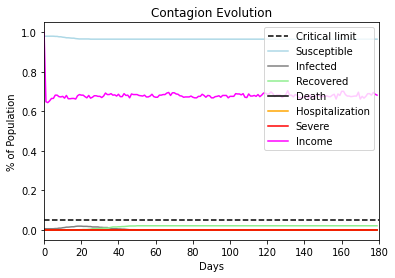

In [13]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [14]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[6186, 4678, 6814]
run with seed 6186:
run with seed 4678:
run with seed 6814:
using average of time series:
stats on susceptible:
data: [0.7164833333333332, 0.94125, 0.9717111111111112]
min:
0.7164833333333332
max:
0.9717111111111112
std:
0.11381717908019118
mean:
0.8764814814814814
median:
0.94125
95% confidence interval for the mean:
(0.5302001210775927,1.2227628418853702)
using average of time series:
stats on infected:
data: [0.07354999999999999, 0.01087222222222222, 0.002]
min:
0.002
max:
0.07354999999999999
std:
0.03184445295202043
mean:
0.028807407407407403
median:
0.01087222222222222
95% confidence interval for the mean:
(-0.06807726833889594,0.12569208315371075)
using average of time series:
stats on recovered:
data: [0.19854999999999998, 0.033877777777777784, 0.011288888888888888]
min:
0.011288888888888888
max:
0.19854999999999998
std:
0.08346251481114633
mean:
0.08123888888888887
median:
0.033877777777777784
95% confidence in

(<function dict.items>, <function dict.items>)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [15]:
sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

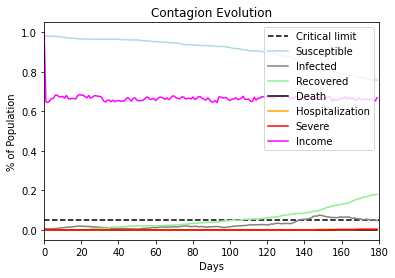

In [16]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [17]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[3767, 8624, 6037]
run with seed 3767:
run with seed 8624:
run with seed 6037:
using average of time series:
stats on susceptible:
data: [0.6112166666666667, 0.9689555555555556, 0.40662777777777787]
min:
0.40662777777777787
max:
0.9689555555555556
std:
0.23239005901016713
mean:
0.6622666666666667
median:
0.6112166666666667
95% confidence interval for the mean:
(-0.04476496448703593,1.3692982978203694)
using average of time series:
stats on infected:
data: [0.09880555555555556, 0.0037166666666666667, 0.12344444444444441]
min:
0.0037166666666666667
max:
0.12344444444444441
std:
0.05162225231580251
mean:
0.07532222222222222
median:
0.09880555555555556
95% confidence interval for the mean:
(-0.08173512099689124,0.2323795654413357)
using average of time series:
stats on recovered:
data: [0.2875777777777778, 0.017327777777777775, 0.4589277777777779]
min:
0.017327777777777775
max:
0.4589277777777779
std:
0.18178327908681693
mean:
0.254611111111

(<function dict.items>, <function dict.items>)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [18]:
sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

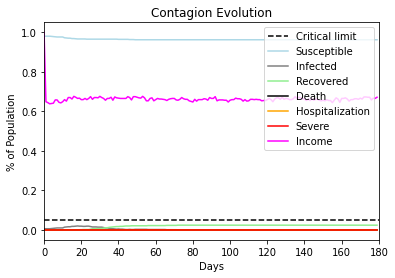

In [19]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [20]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[9636, 9566, 4259]
run with seed 9636:
run with seed 9566:
run with seed 4259:
using average of time series:
stats on susceptible:
data: [0.4017833333333333, 0.9775611111111112, 0.6910055555555555]
min:
0.4017833333333333
max:
0.9775611111111112
std:
0.23506113380462204
mean:
0.6901166666666666
median:
0.6910055555555555
95% confidence interval for the mean:
(-0.025041535722057584,1.4052748690553907)
using average of time series:
stats on infected:
data: [0.1294388888888889, 0.004572222222222222, 0.08202222222222222]
min:
0.004572222222222222
max:
0.1294388888888889
std:
0.05146576771907305
mean:
0.07201111111111112
median:
0.08202222222222222
95% confidence interval for the mean:
(-0.0845701379060932,0.22859236012831546)
using average of time series:
stats on recovered:
data: [0.4602888888888891, 0.009866666666666666, 0.2165]
min:
0.009866666666666666
max:
0.4602888888888891
std:
0.18409252959124436
mean:
0.22888518518518527
median:
0.2

(<function dict.items>, <function dict.items>)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [21]:
sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

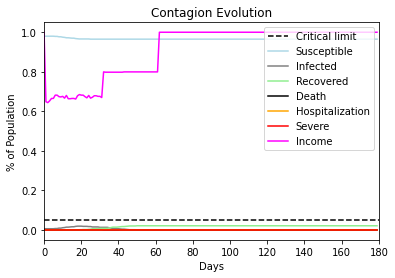

In [22]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [23]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[3625, 7835, 6547]
run with seed 3625:
run with seed 7835:
run with seed 6547:
using average of time series:
stats on susceptible:
data: [0.38403333333333334, 0.2439555555555556, 0.4462981462981463]
min:
0.2439555555555556
max:
0.4462981462981463
std:
0.08461758077710381
mean:
0.3580956783956784
median:
0.38403333333333334
95% confidence interval for the mean:
(0.10065219558947786,0.615539161201879)
using average of time series:
stats on infected:
data: [0.14974444444444443, 0.15605000000000002, 0.14226329226329223]
min:
0.14226329226329223
max:
0.15605000000000002
std:
0.005635216441068066
mean:
0.14935257890257891
median:
0.14974444444444443
95% confidence interval for the mean:
(0.13220779960692838,0.16649735819822944)
using average of time series:
stats on recovered:
data: [0.4519777777777779, 0.5909944444444446, 0.40176490176490187]
min:
0.40176490176490187
max:
0.5909944444444446
std:
0.08003803703469471
mean:
0.4815790413290415
me

(<function dict.items>, <function dict.items>)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [24]:
sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

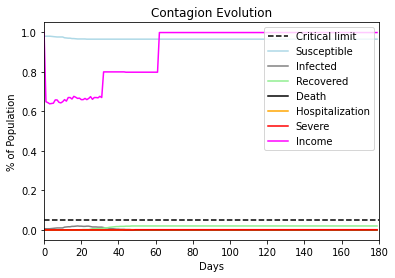

In [25]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [26]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[7094, 8575, 9979]
run with seed 7094:
run with seed 8575:
run with seed 9979:
using average of time series:
stats on susceptible:
data: [0.6141217564870259, 0.9402777777777778, 0.27535797535797535]
min:
0.27535797535797535
max:
0.9402777777777778
std:
0.2714686381065968
mean:
0.6099191698742596
median:
0.6141217564870259
95% confidence interval for the mean:
(-0.21600649504062397,1.4358448347891433)
using average of time series:
stats on infected:
data: [0.11654468840097583, 0.008966666666666668, 0.15226440226440227]
min:
0.008966666666666668
max:
0.15226440226440227
std:
0.0609035391657178
mean:
0.09259191911068158
median:
0.11654468840097583
95% confidence interval for the mean:
(-0.0927031353455288,0.27788697356689196)
using average of time series:
stats on recovered:
data: [0.2577733422044799, 0.043755555555555575, 0.5486568986568986]
min:
0.043755555555555575
max:
0.5486568986568986
std:
0.2069197973134229
mean:
0.28339526547231136

(<function dict.items>, <function dict.items>)